# Prediksi Mahasiswa DO Metode Naive Bayes

## Naive Bayes Classifier (NBC)

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

import pickle

In [ ]:
# Import Data
dataset = pd.read_csv("DataSetSkripsi.csv", sep=',')
dataset

,STATUS,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?
0,Lulus,IYA,IYA,IYA
1,Lulus,IYA,IYA,IYA
2,Lulus,IYA,IYA,IYA
3,Lulus,IYA,IYA,IYA
4,Lulus,IYA,IYA,IYA
...,...,...,...,...
709,Lulus,IYA,TIDAK,IYA
710,Lulus,IYA,IYA,IYA
711,Lulus,IYA,IYA,IYA
712,Lulus,IYA,IYA,IYA


In [ ]:
# Melihat Info Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   STATUS                                 714 non-null    object
 1   Semua Matkul Selesai pada Semster 8 ?  714 non-null    object
 2   Laporan PKL Selesai ?                  714 non-null    object
 3   Sudah Ambil Skripsi ?                  714 non-null    object
dtypes: object(4)
memory usage: 22.4+ KB


In [ ]:
# Melihat Balanced Label
dataset.STATUS.value_counts()

Lulus       578
Drop Out    136
Name: STATUS, dtype: int64

### Labeling Encoder

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada semua fitur kecuali kolom "STATUS"
for column in dataset.columns[1:]:
    dataset[column] = label_encoder.fit_transform(dataset[column])


In [ ]:
# Cek dataset yang sudah di encode
dataset

,STATUS,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?
0,Lulus,0,0,0
1,Lulus,0,0,0
2,Lulus,0,0,0
3,Lulus,0,0,0
4,Lulus,0,0,0
...,...,...,...,...
709,Lulus,0,1,0
710,Lulus,0,0,0
711,Lulus,0,0,0
712,Lulus,0,0,0


### Dataset Spliting

In [ ]:
# Memisahkan fitur dan target
X = dataset.drop('STATUS', axis=1)
y = dataset['STATUS']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melihat Jumlah Dataset Training dan Data Testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape # Data Testing berjumlah 143 dan Jumlah Data Training berjumlah 571

((571, 3), (143, 3), (571,), (143,))

### Membuat Model Naive Bayes

In [ ]:
# Membuat objek klasifikasi Naive Bayes
naive_bayes = GaussianNB()

# Melatih model dengan data latih
naive_bayes.fit(X_train, y_train)

GaussianNB()

### Prediksi Dari Data Training

In [ ]:
# Melakukan prediksi terhadap data training
y_train_pred = naive_bayes.predict(X_train)
y_train_pred

array(['Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Drop Out',
       'Drop Out', 'Drop Out', 'Lulus', 'Drop Out', 'Lulus', 'Lulus',
       'Drop Out', 'Lulus', 'Drop Out', 'Drop Out', 'Drop Out', 'Lulus',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Drop Out', 'Drop Out',
       'Lulus', 'Drop Out', 'Lulus', 'Drop Out', 'Lulus', 'Lulus',
       'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Drop Out', 'Lulus',
       'Lulus', 'Dro

### Prediksi Dari Data testing

In [ ]:
# Melakukan prediksi terhadap data uji
y_pred = naive_bayes.predict(X_test)
y_pred

array(['Lulus', 'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Drop Out',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Drop Out', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Drop Out',
       'Lulus', 'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Drop Out', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Drop Out', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Drop Out', 'Drop Out', 'Drop Out', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Drop Out', 'Lulus', 'Drop Out', 'Drop Out', 'Lulus',
       'Lulus', 'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Drop Out',
       'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Lulus', 'Drop Out',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus', 'Lulus',
       'Lulus', 'Lulus', 'Drop Out', 'Lulus', 'Lulus', 'Lulus',
       'Drop Out', '

### Confusion Matriks Dari Data Training

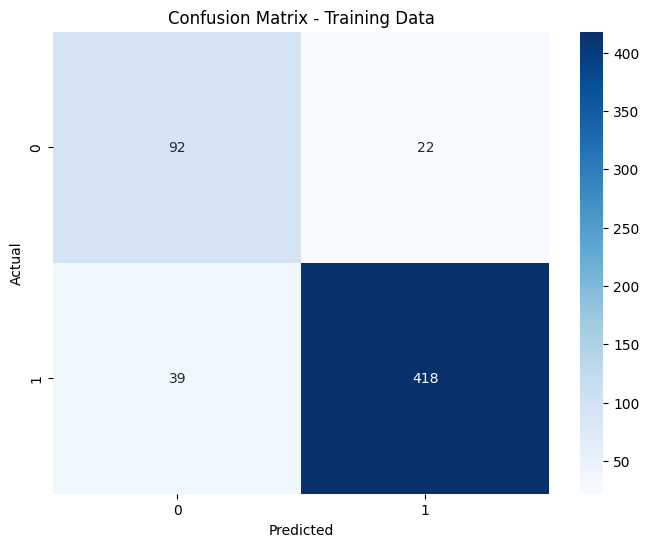

In [ ]:
# Menghitung confusion matrix untuk data training
cm_train = confusion_matrix(y_train, y_train_pred)

# Membuat grafik confusion matrix untuk data training
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Confusion Matriks dari data Data Testing

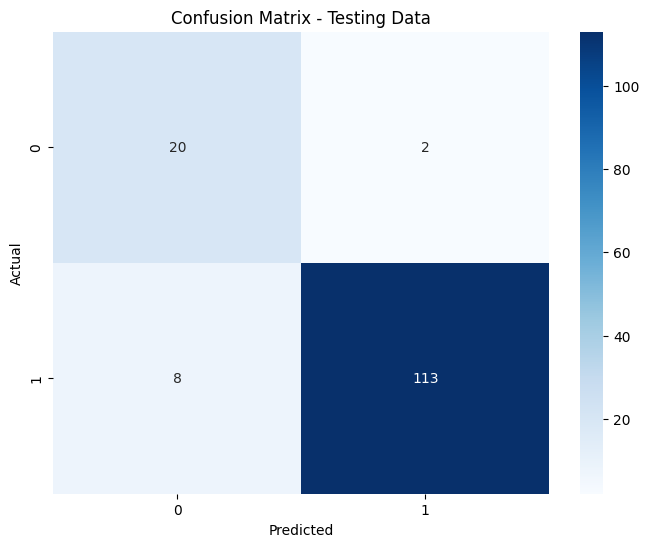

In [ ]:
# Menghitung confusion matrix untuk data testing
cm_test = confusion_matrix(y_test, y_pred)

# Membuat grafik confusion matrix untuk data testing
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Performance dari Data Training

In [ ]:
# Membuat classification report untuk data training
print("Classification Report - Training Data:")
print("")
print(classification_report(y_train, y_train_pred))
print("")
# Menghitung akurasi dari data training
accuracy = accuracy_score(y_train, y_train_pred)
print("Akurasi:", accuracy)

Classification Report - Training Data:

              precision    recall  f1-score   support

    Drop Out       0.70      0.81      0.75       114
       Lulus       0.95      0.91      0.93       457

    accuracy                           0.89       571
   macro avg       0.83      0.86      0.84       571
weighted avg       0.90      0.89      0.90       571


Akurasi: 0.8931698774080561


### Performance Dari Data Testing

In [ ]:
# Membuat classification report untuk data testing
print("Classification Report - Testing Data:")
print("")
print(classification_report(y_test, y_pred))
print("")
# Menghitung akurasi dari data testing
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Classification Report - Testing Data:

              precision    recall  f1-score   support

    Drop Out       0.71      0.91      0.80        22
       Lulus       0.98      0.93      0.96       121

    accuracy                           0.93       143
   macro avg       0.85      0.92      0.88       143
weighted avg       0.94      0.93      0.93       143


Akurasi: 0.9300699300699301


### Mengetahui Score AUC Dari Data Testing

In [ ]:
# Menghitung probabilitas prediksi untuk data pengujian
probs = naive_bayes.predict_proba(X_test)

# Probabilitas kelas positif (misalnya, "Lulus")
positive_probs = probs[:, 1]

# Menghitung skor AUC
auc_score = roc_auc_score(y_test, positive_probs)

# Mencetak skor AUC dengan 2 angka di belakang koma
print("Skor AUC: {:.2f}".format(auc_score))

Skor AUC: 0.98


### Grafik AUC (ROC Curve)

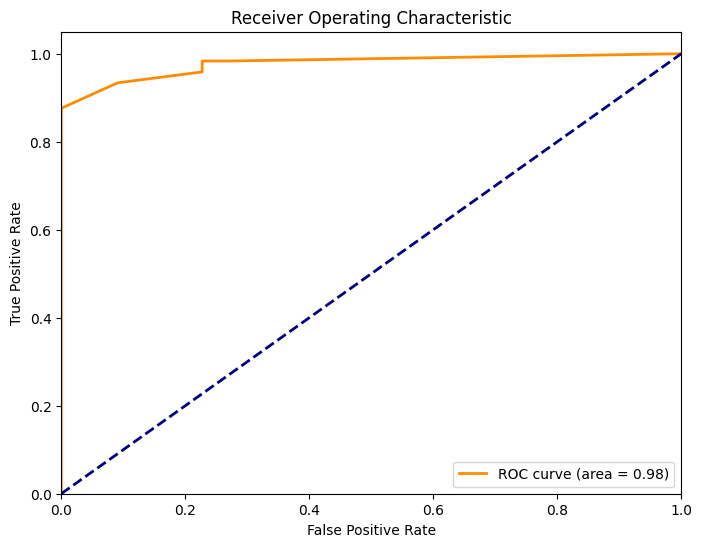

In [ ]:
# Mengganti label 'Drop Out' menjadi 0 dan 'Lulus' menjadi 1 pada y_test
y_test_binary = y_test.replace({'Drop Out': 0, 'Lulus': 1})

# Menghitung kurva ROC
fpr, tpr, thresholds = roc_curve(y_test_binary, positive_probs)
roc_auc = auc(fpr, tpr)

# Membuat grafik ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


### Prediksi Model Naive Bayes dengan 1 data input

In [ ]:
# Contoh data input yang akan diprediksi
input_data = [['IYA', 'IYA', 'IYA']]

# Mengubah data input menjadi array 1D
input_data_flattened = [item for sublist in input_data for item in sublist]

# Melakukan encoding pada data input yang telah diubah ke format 1D
input_data_encoded = label_encoder.transform(input_data_flattened)

# Menyesuaikan bentuk data input_encoded menjadi matriks sesuai dengan jumlah data
input_data_encoded = np.array(input_data_encoded).reshape(len(input_data), -1)

# Melakukan prediksi terhadap data input yang diencode
prediction = naive_bayes.predict(input_data_encoded)

# Menampilkan hasil prediksi dengan keterangan "Lulus" atau "Drop Out"
for i in range(len(input_data)):
    print("Data input:", input_data[i])
    print("Prediksi:", prediction[i])

Data input: ['IYA', 'IYA', 'IYA']
Prediksi: Lulus


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Prediksi Model Naive Bayes Dengan Melihat nilai Probabilitas

In [ ]:
# Contoh data input yang akan diprediksi
input_data = [['IYA', 'IYA', 'IYA']]

# Mengubah data input menjadi array 1D
input_data_flattened = [item for sublist in input_data for item in sublist]

# Melakukan encoding pada data input yang telah diubah ke format 1D
input_data_encoded = label_encoder.transform(input_data_flattened)

# Menyesuaikan bentuk data input_encoded menjadi matriks sesuai dengan jumlah data
input_data_encoded = np.array(input_data_encoded).reshape(len(input_data), -1)

# Melakukan prediksi terhadap data input yang diencode
prediction = naive_bayes.predict(input_data_encoded)

# Mendapatkan probabilitas untuk setiap kelas
# Jika model Anda mendukung metode `predict_proba`, gunakan metode tersebut
# Misalnya, naive_bayes adalah objek model yang telah dilatih
if hasattr(naive_bayes, 'predict_proba'):
    probabilities = naive_bayes.predict_proba(input_data_encoded)

    # Menampilkan hasil prediksi dengan keterangan "Lulus" atau "Drop Out" beserta probabilitasnya
    for i in range(len(input_data)):
        print("Data input:", input_data[i])
        print("Prediksi:", prediction[i])
        print("Probabilitas Lulus:", probabilities[i][1])  # Probabilitas kelas Lulus
        print("Probabilitas Dropout:", probabilities[i][0])  # Probabilitas kelas Dropout
else:
    print("Model tidak mendukung perhitungan probabilitas.")


Data input: ['IYA', 'IYA', 'IYA']
Prediksi: Lulus
Probabilitas Lulus: 0.999960887501147
Probabilitas Dropout: 3.9112498853069944e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Prediksi Dengan Dataset baru yang belum ada label nya

In [ ]:
# Import Data
dataset_prediksi = pd.read_csv("DataPredictionSkripsi.csv", sep=',')
dataset_prediksi

,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?
0,TIDAK,TIDAK,TIDAK
1,TIDAK,TIDAK,TIDAK
2,IYA,TIDAK,IYA
3,IYA,IYA,IYA
4,IYA,IYA,IYA
...,...,...,...
145,TIDAK,TIDAK,TIDAK
146,IYA,IYA,IYA
147,TIDAK,TIDAK,TIDAK
148,IYA,TIDAK,IYA


In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada semua fitur
for column in dataset_prediksi.columns:
    dataset_prediksi[column] = label_encoder.fit_transform(dataset_prediksi[column])

# Prediksi menggunakan model yang telah dilatih sebelumnya
prediksi = naive_bayes.predict(dataset_prediksi)

# Tambahkan kolom "STATUS" ke dataset prediksi dengan hasil prediksi
dataset_prediksi["STATUS"] = prediksi

# Mengembalikan fitur yang telah diencode ke nilai semula
for column in dataset_prediksi.columns:
    if column != "STATUS":
        dataset_prediksi[column] = label_encoder.inverse_transform(dataset_prediksi[column])

# Menampilkan dataset dengan fitur yang telah dikembalikan ke nilai semula
dataset_prediksi


,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?,STATUS
0,TIDAK,TIDAK,TIDAK,Drop Out
1,TIDAK,TIDAK,TIDAK,Drop Out
2,IYA,TIDAK,IYA,Lulus
3,IYA,IYA,IYA,Lulus
4,IYA,IYA,IYA,Lulus
...,...,...,...,...
145,TIDAK,TIDAK,TIDAK,Drop Out
146,IYA,IYA,IYA,Lulus
147,TIDAK,TIDAK,TIDAK,Drop Out
148,IYA,TIDAK,IYA,Lulus


### Prediksi Probabilitas Dengan Dataset Baru Yang Belum Ada Label nya

In [ ]:
# Hapus kolom "STATUS" dari dataset prediksi sebelum prediksi
dataset_prediksi.drop(columns=["STATUS"], inplace=True)

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada semua fitur
for column in dataset_prediksi.columns:
    dataset_prediksi[column] = label_encoder.fit_transform(dataset_prediksi[column])

# Prediksi menggunakan model yang telah dilatih sebelumnya
predictions = naive_bayes.predict(dataset_prediksi)

# Tambahkan kolom "STATUS" ke dataset prediksi dengan hasil prediksi
dataset_prediksi["STATUS"] = predictions

# Menambahkan kolom probabilitas Dropout dan kolom probabilitas Lulus
if hasattr(naive_bayes, 'predict_proba'):
    probabilities = naive_bayes.predict_proba(dataset_prediksi.drop(columns=["STATUS"]))
    dataset_prediksi["Probabilitas Dropout"] = probabilities[:, 0]  # Kolom probabilitas Dropout
    dataset_prediksi["Probabilitas Lulus"] = probabilities[:, 1]   # Kolom probabilitas Lulus

# Mengembalikan fitur yang telah diencode ke nilai semula
for column in dataset_prediksi.columns:
    if column != "STATUS" and column != "Probabilitas Dropout" and column != "Probabilitas Lulus":
        dataset_prediksi[column] = label_encoder.inverse_transform(dataset_prediksi[column])

# Menampilkan dataset dengan fitur yang telah dikembalikan ke nilai semula
dataset_prediksi


,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?,STATUS,Probabilitas Dropout,Probabilitas Lulus
0,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
1,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
2,IYA,TIDAK,IYA,Lulus,0.052438,9.475624e-01
3,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
4,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
...,...,...,...,...,...,...
145,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
146,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
147,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
148,IYA,TIDAK,IYA,Lulus,0.052438,9.475624e-01


In [ ]:
dataset_prediksi.to_excel("hasil prediksi naive bayes.xlsx", index=False)

### Simpan Model

In [ ]:
# Menyimpan model ke file
with open('model_naive_bayes.pkl', 'wb') as file:
    pickle.dump(naive_bayes, file)

### Load Model

In [ ]:
# Memuat model dari file
with open('model_naive_bayes.pkl', 'rb') as file:
    model = pickle.load(file)

### Data Prediksi Ke-2 dengan Model yang sudah disimpan

In [ ]:
# Import Data
dataset_prediksi2 = pd.read_csv("DataPredictionSkripsi_2.csv", sep=',')
dataset_prediksi2

,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?
0,TIDAK,TIDAK,TIDAK
1,TIDAK,TIDAK,TIDAK
2,IYA,TIDAK,IYA
3,IYA,IYA,IYA
4,IYA,IYA,IYA
...,...,...,...
145,TIDAK,TIDAK,TIDAK
146,IYA,IYA,IYA
147,TIDAK,TIDAK,TIDAK
148,IYA,TIDAK,IYA


In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada semua fitur
for column in dataset_prediksi2.columns:
    dataset_prediksi2[column] = label_encoder.fit_transform(dataset_prediksi2[column])

# Prediksi menggunakan model yang telah dilatih sebelumnya
prediksi = model.predict(dataset_prediksi2)

# Tambahkan kolom "STATUS" ke dataset prediksi dengan hasil prediksi
dataset_prediksi2["STATUS"] = prediksi

# Mengembalikan fitur yang telah diencode ke nilai semula
for column in dataset_prediksi2.columns:
    if column != "STATUS":
        dataset_prediksi2[column] = label_encoder.inverse_transform(dataset_prediksi2[column])

# Menampilkan dataset dengan fitur yang telah dikembalikan ke nilai semula
dataset_prediksi2


,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?,STATUS
0,TIDAK,TIDAK,TIDAK,Drop Out
1,TIDAK,TIDAK,TIDAK,Drop Out
2,IYA,TIDAK,IYA,Lulus
3,IYA,IYA,IYA,Lulus
4,IYA,IYA,IYA,Lulus
...,...,...,...,...
145,TIDAK,TIDAK,TIDAK,Drop Out
146,IYA,IYA,IYA,Lulus
147,TIDAK,TIDAK,TIDAK,Drop Out
148,IYA,TIDAK,IYA,Lulus


### Prediksi Dengan Probabilitas Dengan Model Yang sudah disimpan

In [ ]:
# Hapus kolom "STATUS" dari dataset prediksi sebelum prediksi
dataset_prediksi2.drop(columns=["STATUS"], inplace=True)

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada semua fitur
for column in dataset_prediksi2.columns:
    dataset_prediksi2[column] = label_encoder.fit_transform(dataset_prediksi2[column])

# Prediksi menggunakan model yang telah dilatih sebelumnya
predictions = naive_bayes.predict(dataset_prediksi2)

# Tambahkan kolom "STATUS" ke dataset prediksi dengan hasil prediksi
dataset_prediksi2["STATUS"] = predictions

# Menambahkan kolom probabilitas Dropout dan kolom probabilitas Lulus
if hasattr(naive_bayes, 'predict_proba'):
    probabilities = naive_bayes.predict_proba(dataset_prediksi2.drop(columns=["STATUS"]))
    dataset_prediksi2["Probabilitas Dropout"] = probabilities[:, 0]  # Kolom probabilitas Dropout
    dataset_prediksi2["Probabilitas Lulus"] = probabilities[:, 1]   # Kolom probabilitas Lulus

# Mengembalikan fitur yang telah diencode ke nilai semula
for column in dataset_prediksi2.columns:
    if column != "STATUS" and column != "Probabilitas Dropout" and column != "Probabilitas Lulus":
        dataset_prediksi2[column] = label_encoder.inverse_transform(dataset_prediksi2[column])

# Menampilkan dataset dengan fitur yang telah dikembalikan ke nilai semula
dataset_prediksi2


,Semua Matkul Selesai pada Semster 8 ?,Laporan PKL Selesai ?,Sudah Ambil Skripsi ?,STATUS,Probabilitas Dropout,Probabilitas Lulus
0,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
1,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
2,IYA,TIDAK,IYA,Lulus,0.052438,9.475624e-01
3,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
4,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
...,...,...,...,...,...,...
145,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
146,IYA,IYA,IYA,Lulus,0.000039,9.999609e-01
147,TIDAK,TIDAK,TIDAK,Drop Out,1.000000,2.440948e-08
148,IYA,TIDAK,IYA,Lulus,0.052438,9.475624e-01


### Persentase LULUS dan DROP OUT dari data prediksi

Persentase Lulus: 66.67%
Persentase Drop Out: 33.33%



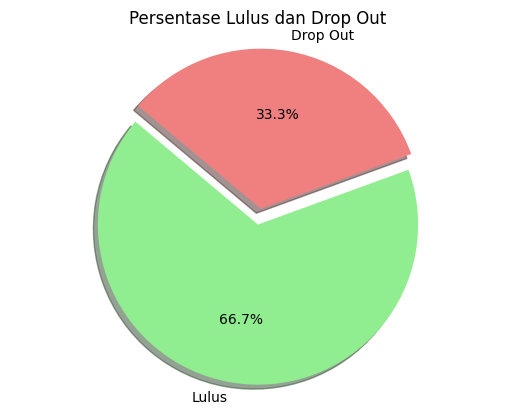

In [ ]:
# Menghitung jumlah data Lulus dan Drop Out
jumlah_lulus = dataset_prediksi[dataset_prediksi["STATUS"] == "Lulus"].shape[0]
jumlah_drop_out = dataset_prediksi[dataset_prediksi["STATUS"] == "Drop Out"].shape[0]

# Menghitung persentase Lulus dan Drop Out
total_data = len(dataset_prediksi)
persentase_lulus = (jumlah_lulus / total_data) * 100
persentase_drop_out = (jumlah_drop_out / total_data) * 100

# Menampilkan persentase Lulus dan Drop Out
print("Persentase Lulus: {:.2f}%".format(persentase_lulus))
print("Persentase Drop Out: {:.2f}%".format(persentase_drop_out))
print(""
)
# Membuat grafik pie
labels = ['Lulus', 'Drop Out']
sizes = [persentase_lulus, persentase_drop_out]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Pie slice exploded

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Membuat lingkaran pie menjadi persegi
plt.title('Persentase Lulus dan Drop Out')
plt.show()
